# HW 7

## Importance Sampling

In [155]:
# Ronaldo Ascano
# due 10.17.18

# import libraries
import numpy as np
import matplotlib.pyplot as plt
from math import exp, log
from scipy import integrate
from numba import jit
import random

plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams.update({'font.size': 15})

In [134]:
@jit
def Simpson_Rule(a, b, n, plot=1):

    h = lambda x: 1/np.sqrt(x)/(np.exp(x)+1)

    base = (b - a) / n
    results_x = np.linspace(a, b, n+1)
    height = h(results_x)
    area = np.empty([n+1], float)
    
    for i in range(n+1):
        
        # determines coefficients for each ith entry
        if i == 0 or i == n:
            coef = 1/3               # if i is the first and last then coef=1/3
        elif i%2 == 1:
            coef = 4/3               # if i is divisible by 2 then coef=4/3
        else: 
            coef = 2/3               # else if i is odd then coef=2/3
            
        area[i] = coef*height[i]*base
                
    if plot == 1:
        
        x = np.linspace(a, b, n)
        output_y = h(x)
        plt.plot(x, output_y, 'r')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.xlim([a,b])
        y2 = np.array([0,0])
        
        for i in range(n):
            
            x0 = results_x[i:i+2]
            y1 = height[i:i+2]
            plt.fill_between(x0, y1, y2, where=y1>=y2, facecolor='yellow')
            linex, liney = [results_x[i+1], results_x[i+1]], [0, height[i+1]]
            plt.plot(linex, liney, color='black', linewidth=2.0)
            plt.title("Simpson's Rule")
        plt.show
        print("Area using Simpson's rule: ", sum(area))


            
    return sum(area)

Area using Simpson's rule:  inf


/Users/ronascano/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


inf

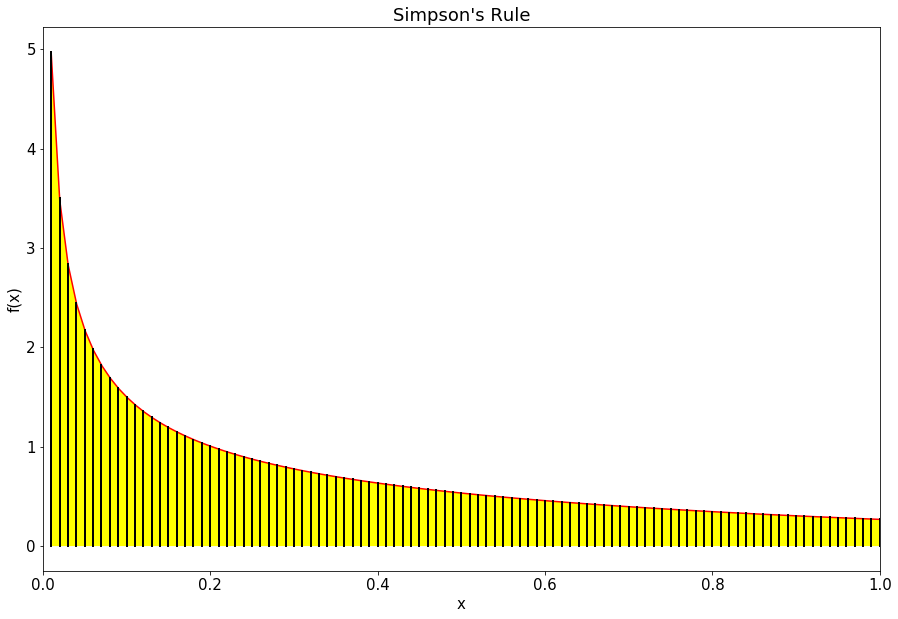

In [156]:
Simpson_Rule(0.0,1,100)

### In the figure above, we cannot calculate the area because of its divergence.

### Below we will use importance sampling to avoid the divergence error.

In [36]:
f = lambda x: 1/np.sqrt(x)/(np.exp(x)+1)

integral = integrate.quad(f,0.0,1)

print('From scipy:', integral[0])

From scipy: 0.8389329600133838


In [31]:
F = lambda x: 1/np.sqrt(x)/(np.exp(x)+1)

W = lambda x: 1/np.sqrt(x)

integrate_W = integrate.quad(W,0.0,1)


sum_of_ratios = []


for i in range(1000000):                         # up to N random points
    x = random.random()
    sum_of_ratios.append(F(x)/W(x))
        
I = (sum(sum_of_ratios)*integrate_W[0])/N

print('Area using importance sampling:',I)

Area using importance sampling: 0.759712790522409


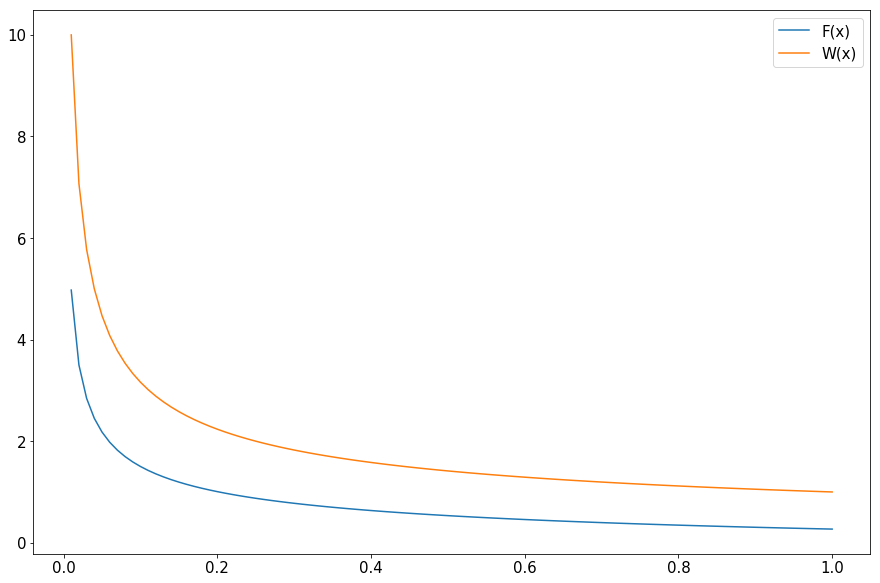

In [157]:
x = np.linspace(0.01,1,100)

plt.plot(x,F(x), label='F(x)')
plt.plot(x,W(x), label='W(x)')
plt.legend()

## Monte Carlo Integration

1. Monte Carlo Integral:

Calculate the area shaded in green.

2. Error Analysis:

Try to do the intergral many times (100) for different $N$ values (100, 1000, 10000, 100000), collect the data and calculate its standard varaince.

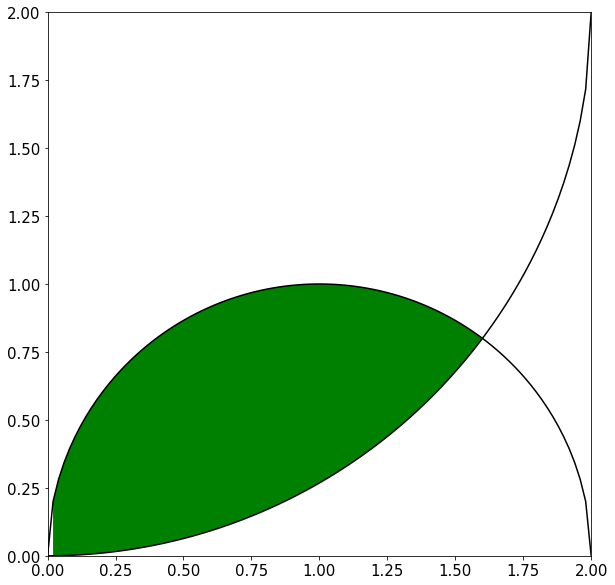

In [159]:
# From Prof Repo

import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

x1 = np.linspace(0,2,100)
y1 = np.sqrt(1-(x1-1)**2)
ax1.plot(x1,y1,'k')

y2 = 2-np.sqrt(4-x1**2)
ax1.plot(x1,y2,'k')

ax1.set_xlim(0,2)
ax1.set_ylim(0,2)
ax1.fill_between(x1, y1, y2, where=y1>y2, facecolor='green')

plt.show()

In [160]:
def J(x):
    return np.sqrt(1-(x-1)**2)
def K(x):
    return 2-np.sqrt(4-x**2)

integrate_J = integrate.quadrature(J,0,2)[0]
integrate_K = integrate.quadrature(K,0,2)[0]

# Area = area of top function - area of bottom function
Area = integrate_J - integrate_K

/Users/ronascano/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:201: AccuracyWarning: maxiter (50) exceeded. Latest difference = 3.957299e-07
  AccuracyWarning)
/Users/ronascano/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:201: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.797860e-07
  AccuracyWarning)


In [132]:
print('Area of the shaded green using scipy: ', Area)

Area of the shaded green using scipy:  0.7123999016481135


## Using MONTE CARLO INTEGRATION

In [136]:
# MC intergral

@jit
def MC1(N):
    count = 0
    for i in range(N):
        x = 2*random.random()
        y = random.random()
        if y < J(x):
            count += 1
    I = 2*count/N
    return I

@jit
def MC2(N):
    count = 0
    for i in range(N):
        x = 2*random.random()
        y = random.random()
        if y < K(x):
            count += 1
    I = 2*count/N
    return I

@jit
def CalculateAreaBetweenCurves(N):
    return MC1(N)-MC2(N)

In [137]:
MC1(100)

1.64

In [138]:
MC1(1000)

1.536

In [139]:
MC1(10000)

1.5606

In [140]:
MC1(100000)

1.57376

In [141]:
MC2(100)

0.82

In [142]:
MC2(1000)

0.72

In [143]:
MC2(10000)

0.7758

In [144]:
MC2(100000)

0.77168

In [166]:
print('Area using MONTE CARLO INTEGRATION at N=100: ', CalculateAreaBetweenCurves(100))
print('Area using MONTE CARLO INTEGRATION at N=1000: ', CalculateAreaBetweenCurves(1000))
print('Area using MONTE CARLO INTEGRATION at N=10000:', CalculateAreaBetweenCurves(10000))
print('Area using MONTE CARLO INTEGRATION at N=100000:', CalculateAreaBetweenCurves(100000))

Area using MONTE CARLO INTEGRATION at N=100:  0.6000000000000001
Area using MONTE CARLO INTEGRATION at N=1000:  0.8320000000000001
Area using MONTE CARLO INTEGRATION at N=10000: 0.7918000000000001
Area using MONTE CARLO INTEGRATION at N=100000: 0.8071799999999999


## Error Analysis

In [165]:
arealist = np.array([CalculateAreaBetweenCurves(100),CalculateAreaBetweenCurves(1000),
                     CalculateAreaBetweenCurves(10000),CalculateAreaBetweenCurves(100000)])

print(arealist)
print('')
print('Standard Deviation: ', np.std(arealist))

[0.92    0.85    0.8018  0.80256]

Standard Deviation:  0.048242722767273406
